Esse tema é algo que não pensamos em momento algum, afinal, o nosso ouvido faz todo o trabalho sem sequer nos preocuparmos.
Como saber quando tem alguém falando? Pra nós, é tão simples que o nosso cérebro **quase** não erra.

Epa, como assim? O nosso cérebro erra na detecção de vozes? 

<img src="https://s2.glbimg.com/w1eVxYRdSAia5-eWn9KxwgHmU44=/512x320/smart/e.glbimg.com/og/ed/f/original/2013/12/19/gollum790.jpg">

SIIIIIIIIM! Sabe quando você tá num lugar vazio e simplesmente ouve alguém, alguma voz, e fica perguntando: "Tem alguém aí"?
Tá, esse exemplo ficou meio filme de terror, mas pense numa situação que você está na sala ou na cozinha com algum familiar, e você ouve que ele te chamou, e fica aquela situação:

- "Você falou algo?"
- "Eu? Eu não..."
- "Ué, eu ouvi você falando."
- "Você tá ouvindo coisas."

Sem entrarmos no mundo de coisas que um tema como esse pode abrir, vamos assumir que esse é um exemplo de quando o seu cérebro erra.

Então já sabemos a partir daí que o problema parece simples, e majoritariamente conseguimos lidar com isso sem sequer percebermos que estamos "detectando", mas que tem uma pequena camada de erro intrínseca.

Mas então, como que o cérebro faz isso?

## Como funciona o audição?

Nós ouvimos tantas coisas o dia todo, seja para assistir uma série, ouvir um podcast ou mesmo entrar em uma conferência no trabalho.

E sequer nos preocupamos em saber como funciona.

- Todo som é tido como uma perturbação nos fluxos de ar ao nosso redor, e essas ondas, como chamamos, fazem pequenas alterações nessa pressão.
- Com isso, o ar movimentado entra em nossos ouvidos, e move o nosso tímpano, que movimenta o martelo, que movimenta a bigorna e movimenta o estribo, que então faz pequenas alterações no líquido presente dentro da cóclea, e a dinâmica no fluído movimenta também a membrana basilar, que movimenta as células ciliadas, como se fossem pequenas células de fio de cabelo.
- Quando um determinado som entra (um mosquito, por exemplo), apenas algumas células ciliadas se movem, e quando outro som (o barulho de uma gaivota), um outro conjunto de células ciliadas se movem.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Anatomy_of_the_Human_Ear_pt.svg/1200px-Anatomy_of_the_Human_Ear_pt.svg.png" width="400">

Bastante coisa né? Mas eu também não sou o cara da anatomia, tem um video [bem explicativo aqui](https://www.youtube.com/watch?v=LkGOGzpbrCk).

## E como simular isso para o computador?

Agora você tem uma breve idéia de como é o som, nós precisamos entender como é esse som que sai do computador?
Esse é um tema interessante e dá pra se aprofundar demais no assunto, mas vamos por partes, e começar com uma introdução básica, e depois a gente vai aprofundando em outros posts, tá bem?

## Como funciona o sinal de audio?

Sabemos então que o som são perturbações de ar que chegam aos nossos ouvidos, movimentam um monte de coisas e o cérebro compreende essas movimentações e transforma em informações, certo?

E se fossemos simular a mesma situação, mas de uma forma que pudessemos criar um produto pra vender?

- O primeiro passo seria perceber o som, então precisamos de algo que se movimente com as alterações do ar.
- O segundo passo, são os ossinhos pra ficar mexendo, como fazemos isso?
- O terceiro é transformar isso em algo que um computador pudesse ler...

Coloca tudo isso, enfia um monte de engenheiro maluco numa sala, e pronto, temos um microfone!

<img src="https://i.pinimg.com/originals/05/51/f5/0551f506725ac1deeaa85d46f8b9a5fd.jpg" width=400>

Pensa comigo, o microfone tem uma membrana, ou película que se move, certo? E conforme tais movimentações, a resistência de um determinado material se movimenta. (Seriam os ossos?)

E bom, depois de muito maluco inventar uma porrada de coisa que somos eternamente gratos, também conseguimos ler a resistência de um determinado material e transformar essas leituras em valores na tela de um computador.

Pronto, parece até simples depois de toda maluquice pronta né? Um video [explicativo de apoio aqui](https://www.youtube.com/watch?v=ejuXtM2vpi0).



## Como realizar detecção de atividade de voz?

Agora que você já tem uma breve noção, a proposta abaixo é demonstrar de forma simples como você pode aplicar um modelo para identificar quando há uma pessoa falando, e quando não há uma pessoa falando.

Ainda nesse tema, é possível explorar e adentrar no assunto de forma tão complexa, que ficariamos por páginas e páginas explorando o que é uma voz, como podemos detectar, entrar em detalhes de ruídos, e quais os algoritmos mais clássicos para tratar o problema, ou os algoritmos que são o estado da arte.

A minha proposta inicial é:

"Olha, dá pra fazer, e não é tão difícil com o que temos hoje produzido de código, tá vendo?"

Mas se você depois quiser entrar em detalhes, como tempo de processamento, se é a melhor técnica ou não pro seu negócio/problema, sobre as tantas outras técnicas existentes, e o fato de programar em python não ser tão veloz como C++, eu ficaria feliz de conversar contigo, me mande uma mensagem! Pretendo fazer mais posts explorando em profundidade depois.

## Importando as bibliotecas necessárias

In [1]:
import librosa
import pandas as pd
import IPython.display as ipd
import numpy as np
from pyannote.core import Timeline, Segment
import matplotlib.pyplot as plt
from librosa.display import waveplot

## Carregando os audios de exemplo

In [2]:
audio1, sr1 = librosa.load("wav/OSR_us_000_0010_8k.wav")
audio2, sr2 = librosa.load("wav/OSR_us_000_0031_8k.wav")

In [2]:
# ipd.Audio(audio1, rate=sr1)

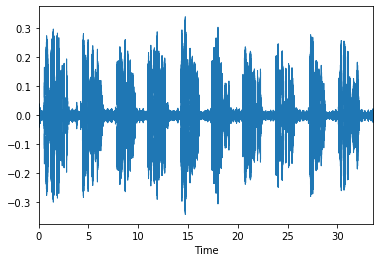

In [4]:
waveplot(audio1)

In [1]:
# ipd.Audio(audio2, rate=sr2)

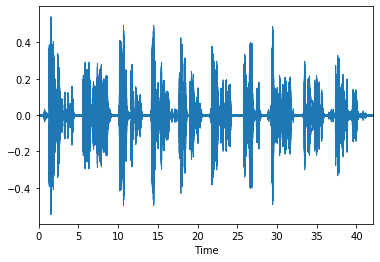

In [6]:
waveplot(audio2)

## Carregando as marcações reais de fala

In [7]:
df1 = pd.read_csv('labels/OSR_us_000_0010_8k.tsv', sep='\t')
df2 = pd.read_csv('labels/OSR_us_000_0031_8k.tsv', sep='\t')

In [8]:
segments1 = []
segments2 = []

for row in df1.index:
    segments1.append(Segment(start=df1['start'][row], end=df1['end'][row]))
    
for row in df2.index:
    segments2.append(Segment(start=df2['start'][row], end=df2['end'][row]))
    

ground_speech1 = Timeline(segments=segments1)
ground_speech2 = Timeline(segments=segments2)

## Carregando modelo pré treinado de VAD

In [9]:
import torch
sad = torch.hub.load('pyannote/pyannote-audio', 'sad_ami')

Using cache found in C:\Users\ryoji/.cache\torch\hub\pyannote_pyannote-audio_master


In [10]:
test_file1 = {'uri': 'OSR_us_000_0010_16k', 'audio': 'wav/OSR_us_000_0010_8k.wav'}
test_file2 = {'uri': 'OSR_us_000_0031_16k', 'audio': 'wav/OSR_us_000_0031_8k.wav'}

In [11]:
# obtain raw SAD scores (as `pyannote.core.SlidingWindowFeature` instance)
# SAD stands for Speech Activity Detection
sad_scores1 = sad(test_file1)
sad_scores2 = sad(test_file2)

# binarize raw SAD scores
# NOTE: both onset/offset values were tuned on AMI dataset.
# you might need to use different values for better results.
from pyannote.audio.utils.signal import Binarize
binarize = Binarize(offset=0.52, onset=0.52, log_scale=True, 
                    min_duration_off=0.1, min_duration_on=0.1)

# speech regions (as `pyannote.core.Timeline` instance)
speech1 = binarize.apply(sad_scores1, dimension=1)
speech2 = binarize.apply(sad_scores2, dimension=1)

### Comparando os resultados

Veja que os segmentos preditos possuem uma tamanho ligeiramente maior, que acaba por comportar todo o segmento de audio, e também pode ter sido em relação a uma marcação que foi feita como um "corte seco".

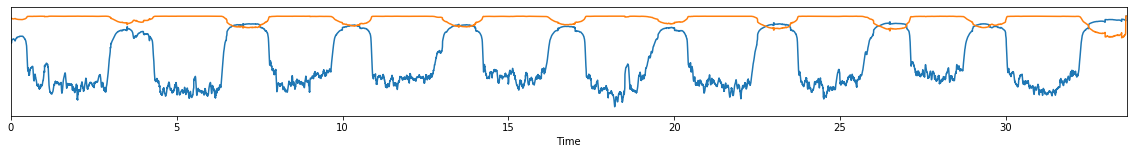

In [12]:
sad_scores1

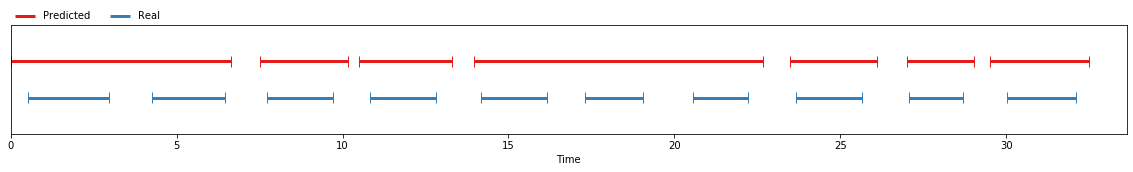

In [13]:
## Predição do modelo para o audio 1
from pyannote.core import Annotation, notebook

annotation = Annotation()
for segment in speech1.segments_list_:
    annotation[segment] = "Predicted"
    
for segment in ground_speech1.segments_list_:
    annotation[segment] = "Real"
    
annotation

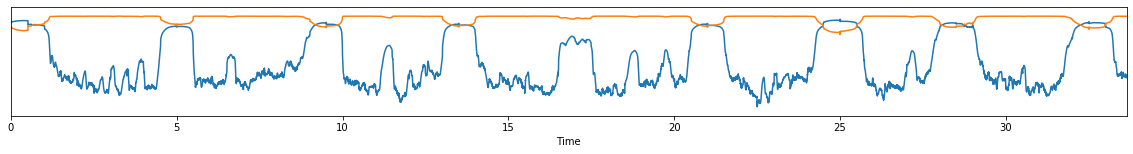

In [14]:
sad_scores2

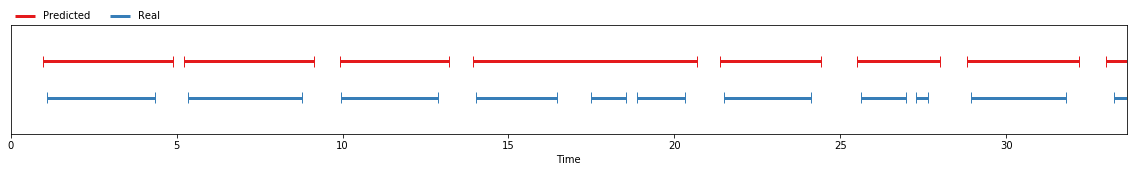

In [15]:
from pyannote.core import Annotation, notebook

annotation = Annotation()
for segment in speech2.segments_list_:
    annotation[segment] = "Predicted"
    
for segment in ground_speech2.segments_list_:
    annotation[segment] = "Real"
    
annotation